## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

# Trying some various ML models

In [37]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pydot
from IPython.display import SVG
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt


def gen_data():
    #SIZE = 40000
    SIZE = 4000
    a = np.random.normal(0, 1, SIZE)
    b = np.random.normal(0, 1, SIZE)
    c = np.random.normal(0, 1, SIZE)
    d = np.random.normal(0, 1, SIZE)
    e = np.random.normal(0, 1, SIZE)
    f= a + b + c + d + e + np.random.normal(0, 1, SIZE)
    g = f + np.random.normal(0, 1, SIZE)
    g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data_binomial():
    SIZE = 10000
    a = np.random.binomial(2, 0.5, size=SIZE)
    b = np.random.binomial(2, 0.5, size=SIZE)
    c = np.random.binomial(2, 0.5, size=SIZE)
    d = np.random.binomial(2, 0.5, size=SIZE)
    e = np.random.binomial(2, 0.5, size=SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + np.random.binomial(2, 0.5, size=SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data_discrete():
    SIZE = 40000
    a = discrete_gauss(-3,3, SIZE)
    b = discrete_gauss(-3,3, SIZE)
    c = discrete_gauss(-3,3, SIZE)
    d = discrete_gauss(-3,3, SIZE)
    e = discrete_gauss(-3,3, SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + discrete_gauss(-3,3, SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})


def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums



def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(ind + width / 2, x_ax, rotation=75, size = 14)
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()


In [6]:
# generate our data
df = gen_data()

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


Error: LogisticRegression() 0.26995073891625615


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1812807881773399
Error: DecisionTreeClassifier() 0.2650246305418719
Error: LinearSVC() 0.3054187192118227
Error: GaussianNB() 0.3812807881773399
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23842364532019705
Error: LinearDiscriminantAnalysis() 0.37438423645320196
Error: RandomForestClassifier() 0.30935960591133005
Error: ExtraTreesClassifier() 0.30738916256157633
Error: AdaBoostClassifier() 0.29064039408866993
Error: BaggingClassifier() 0.30935960591133005
Error: GradientBoostingClassifier() 0.35960591133004927
Error: MLPClassifier() 0.3724137931034483
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.2861386138613861


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18118811881188118
Error: DecisionTreeClassifier() 0.2801980198019802
Error: LinearSVC() 0.31485148514851485
Error: GaussianNB() 0.3574257425742574
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2524752475247525
Error: LinearDiscriminantAnalysis() 0.37425742574257426
Error: RandomForestClassifier() 0.29504950495049503
Error: ExtraTreesClassifier() 0.29306930693069305
Error: AdaBoostClassifier() 0.2603960396039604
Error: BaggingClassifier() 0.3118811881188119
Error: GradientBoostingClassifier() 0.3722772277227723
Error: MLPClassifier() 0.36633663366336633
Error: LogisticRegression() 0.26884920634920634


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16170634920634921
Error: DecisionTreeClassifier() 0.24702380952380953
Error: LinearSVC() 0.30952380952380953
Error: GaussianNB() 0.3888888888888889
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2638888888888889


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.38492063492063494
Error: RandomForestClassifier() 0.32341269841269843
Error: ExtraTreesClassifier() 0.2976190476190476
Error: AdaBoostClassifier() 0.25496031746031744
Error: BaggingClassifier() 0.3055555555555556
Error: GradientBoostingClassifier() 0.3472222222222222
Error: MLPClassifier() 0.3740079365079365
Error: LogisticRegression() 0.26613704071499505


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1717974180734856
Error: DecisionTreeClassifier() 0.25819265143992054
Error: LinearSVC() 0.31082423038728896
Error: GaussianNB() 0.38033763654419067
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23535253227408143
Error: LinearDiscriminantAnalysis() 0.37934458788480635
Violation: {'f'} {'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.2969215491559086
Error: ExtraTreesClassifier() 0.30784508440913605
Error: AdaBoostClassifier() 0.24627606752730885
Error: BaggingClassifier() 0.30784508440913605
Error: GradientBoostingClassifier() 0.3684210526315789
Error: MLPClassifier() 0.3743793445878848
Error: LogisticRegression() 0.29096325719960275


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21946375372393248
Error: DecisionTreeClassifier() 0.23535253227408143
Error: LinearSVC() 0.2919563058589871
Error: GaussianNB() 0.35253227408143
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23435948361469713
Error: LinearDiscriminantAnalysis() 0.35253227408143
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3028798411122145
Error: ExtraTreesClassifier() 0.2869910625620655
Error: AdaBoostClassifier() 0.26514399205561073
Error: BaggingClassifier() 0.27805362462760674
Error: GradientBoostingClassifier() 0.3346573982125124
Error: MLPClassifier() 0.3316782522343595
Error: LogisticRegression() 0.2614314115308151


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.24552683896620278
Violation: {'f'} {'b', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2664015904572565
Error: LinearSVC() 0.2962226640159046
Error: GaussianNB() 0.34592445328031807
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24950298210735586
Error: LinearDiscriminantAnalysis() 0.3658051689860835
Error: RandomForestClassifier() 0.28727634194831014
Error: ExtraTreesClassifier() 0.3111332007952286
Error: AdaBoostClassifier() 0.24453280318091453
Error: BaggingClassifier() 0.31510934393638174
Error: GradientBoostingClassifier() 0.3379721669980119
Error: MLPClassifier() 0.34791252485089463
Error: LogisticRegression() 0.27435387673956263


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2117296222664016
Error: DecisionTreeClassifier() 0.27236580516898606
Error: LinearSVC() 0.2982107355864811
Error: GaussianNB() 0.34791252485089463
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2504970178926441
Error: LinearDiscriminantAnalysis() 0.3558648111332008
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3061630218687873
Error: ExtraTreesClassifier() 0.31411530815109345
Error: AdaBoostClassifier() 0.24254473161033796
Error: BaggingClassifier() 0.30218687872763417
Error: GradientBoostingClassifier() 0.3399602385685885
Error: MLPClassifier() 0.352882703777336
Error: LogisticRegression() 0.2716417910447761


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16616915422885573
Violation: {'f'} {'c'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.281592039800995
Error: LinearSVC() 0.2676616915422886
Error: GaussianNB() 0.373134328358209
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.25771144278606967
Error: LinearDiscriminantAnalysis() 0.3611940298507463
Error: RandomForestClassifier() 0.33034825870646767
Error: ExtraTreesClassifier() 0.32338308457711445
Error: AdaBoostClassifier() 0.2626865671641791
Error: BaggingClassifier() 0.30646766169154227
Error: GradientBoostingClassifier() 0.3522388059701492
Error: MLPClassifier() 0.382089552238806
Error: LogisticRegression() 0.25771144278606967


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2019900497512438
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2537313432835821
Error: LinearSVC() 0.2855721393034826
Error: GaussianNB() 0.3562189054726368
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23482587064676616
Error: LinearDiscriminantAnalysis() 0.3661691542288557
Error: RandomForestClassifier() 0.31144278606965176
Error: ExtraTreesClassifier() 0.30149253731343284
Error: AdaBoostClassifier() 0.24676616915422886
Error: BaggingClassifier() 0.3124378109452736
Error: GradientBoostingClassifier() 0.3582089552238806
Error: MLPClassifier() 0.3522388059701492
Error: LogisticRegression() 0.28913260219341974


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2193419740777667
Error: DecisionTreeClassifier() 0.2831505483549352
Error: LinearSVC() 0.3240279162512463
Error: GaussianNB() 0.35194416749750745
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2432701894317049
Error: LinearDiscriminantAnalysis() 0.36390827517447655
Error: RandomForestClassifier() 0.3090727816550349
Error: ExtraTreesClassifier() 0.29910269192422734
Error: AdaBoostClassifier() 0.2472582253240279
Error: BaggingClassifier() 0.3180458624127617
Error: GradientBoostingClassifier() 0.35992023928215355
Error: MLPClassifier() 0.36490528414755735
Error: LogisticRegression() 0.26520438683948155


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.10967098703888335
Violation: {'f'} {'c', 'b', 'a'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.259222333000997
Error: LinearSVC() 0.30309072781655033
Error: GaussianNB() 0.35194416749750745
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24426719840478564
Error: LinearDiscriminantAnalysis() 0.3339980059820538
Violation: {'f'} {'c', 'e', 'd', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3190428713858425
Error: ExtraTreesClassifier() 0.3320039880358923
Error: AdaBoostClassifier() 0.23429710867397807
Error: BaggingClassifier() 0.29112662013958124
Error: GradientBoostingClassifier() 0.33998005982053836
Error: MLPClassifier() 0.33599202392821537
Error: LogisticRegression() 0.2502492522432702


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18045862412761715
Error: DecisionTreeClassifier() 0.26321036889332006
Error: LinearSVC() 0.292123629112662
Error: GaussianNB() 0.3629112662013958
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23030907278165502
Error: LinearDiscriminantAnalysis() 0.37387836490528414
Error: RandomForestClassifier() 0.2951146560319043
Error: ExtraTreesClassifier() 0.32103688933200397
Error: AdaBoostClassifier() 0.24027916251246262
Error: BaggingClassifier() 0.30109670987038883
Error: GradientBoostingClassifier() 0.3589232303090728
Error: MLPClassifier() 0.36490528414755735
Error: LogisticRegression() 0.28771228771228774


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.22077922077922077
Error: DecisionTreeClassifier() 0.26973026973026976
Error: LinearSVC() 0.3146853146853147
Error: GaussianNB() 0.34965034965034963
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24475524475524477
Error: LinearDiscriminantAnalysis() 0.36063936063936064
Error: RandomForestClassifier() 0.2947052947052947
Error: ExtraTreesClassifier() 0.31368631368631367
Error: AdaBoostClassifier() 0.24875124875124874
Error: BaggingClassifier() 0.31368631368631367
Error: GradientBoostingClassifier() 0.33166833166833165
Error: MLPClassifier() 0.35664335664335667
Error: LogisticRegression() 0.27172827172827174


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2057942057942058
Error: DecisionTreeClassifier() 0.2707292707292707
Error: LinearSVC() 0.2887112887112887
Error: GaussianNB() 0.36863136863136864
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24975024975024976
Error: LinearDiscriminantAnalysis() 0.36063936063936064
Error: RandomForestClassifier() 0.2997002997002997
Error: ExtraTreesClassifier() 0.2947052947052947
Error: AdaBoostClassifier() 0.24775224775224775
Error: BaggingClassifier() 0.3086913086913087
Error: GradientBoostingClassifier() 0.34865134865134867
Error: MLPClassifier() 0.36063936063936064
Error: LogisticRegression() 0.24775224775224775


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.22277722277722278
Error: DecisionTreeClassifier() 0.28471528471528473
Error: LinearSVC() 0.2907092907092907
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: GaussianNB() 0.3886113886113886
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23476523476523475
Error: LinearDiscriminantAnalysis() 0.3756243756243756
Error: RandomForestClassifier() 0.34465534465534464
Error: ExtraTreesClassifier() 0.3276723276723277
Error: AdaBoostClassifier() 0.24075924075924077
Error: BaggingClassifier() 0.33466533466533466
Error: GradientBoostingClassifier() 0.3626373626373626
Error: MLPClassifier() 0.3696303696303696
Error: LogisticRegression() 0.2807192807192807


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17382617382617382
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.26673326673326675
Error: LinearSVC() 0.3096903096903097
Error: GaussianNB() 0.34665334665334663
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2517482517482518
Error: LinearDiscriminantAnalysis() 0.35264735264735264
Error: RandomForestClassifier() 0.2957042957042957
Error: ExtraTreesClassifier() 0.3046953046953047
Error: AdaBoostClassifier() 0.25674325674325676
Error: BaggingClassifier() 0.3096903096903097
Error: GradientBoostingClassifier() 0.3436563436563437
Error: MLPClassifier() 0.34665334665334663
Error: LogisticRegression() 0.26673326673326675


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1968031968031968
Error: DecisionTreeClassifier() 0.27972027972027974
Error: LinearSVC() 0.2977022977022977
Error: GaussianNB() 0.3646353646353646
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24875124875124874
Error: LinearDiscriminantAnalysis() 0.36863136863136864
Error: RandomForestClassifier() 0.2987012987012987
Error: ExtraTreesClassifier() 0.3036963036963037
Error: AdaBoostClassifier() 0.24175824175824176
Error: BaggingClassifier() 0.2997002997002997
Error: GradientBoostingClassifier() 0.35564435564435565
Error: MLPClassifier() 0.36863136863136864
Error: LogisticRegression() 0.23876123876123875


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21878121878121878
Error: DecisionTreeClassifier() 0.26873126873126874
Error: LinearSVC() 0.2917082917082917
Error: GaussianNB() 0.34765234765234765
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.26673326673326675
Error: LinearDiscriminantAnalysis() 0.35864135864135865
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3026973026973027
Error: ExtraTreesClassifier() 0.2997002997002997
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: AdaBoostClassifier() 0.24975024975024976
Error: BaggingClassifier() 0.32367632367632365
Error: GradientBoostingClassifier() 0.3336663336663337
Error: MLPClassifier() 0.3546453546453546
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.252747252747252

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1998001998001998
Error: DecisionTreeClassifier() 0.29270729270729273
Error: LinearSVC() 0.29270729270729273
Error: GaussianNB() 0.34765234765234765
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23876123876123875
Error: LinearDiscriminantAnalysis() 0.3676323676323676
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3076923076923077
Error: ExtraTreesClassifier() 0.3126873126873127
Error: AdaBoostClassifier() 0.2517482517482518
Error: BaggingClassifier() 0.3166833166833167
Error: GradientBoostingClassifier() 0.32967032967032966
Error: MLPClassifier() 0.34665334665334663
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.2732732732732733


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19519519519519518
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2672672672672673
Error: LinearSVC() 0.3083083083083083
Error: GaussianNB() 0.35735735735735735
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.25825825825825827


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.35735735735735735
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.30930930930930933
Error: ExtraTreesClassifier() 0.2912912912912913
Error: AdaBoostClassifier() 0.2552552552552553
Error: BaggingClassifier() 0.2932932932932933
Error: GradientBoostingClassifier() 0.3563563563563564
Error: MLPClassifier() 0.35735735735735735
Error: LogisticRegression() 0.25625625625625625


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18118118118118118
Violation: {'f'} {'d', 'a'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.26226226226226224
Error: LinearSVC() 0.3023023023023023
Error: GaussianNB() 0.36936936936936937
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.25125125125125125


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37537537537537535
Error: RandomForestClassifier() 0.3153153153153153
Error: ExtraTreesClassifier() 0.3063063063063063
Error: AdaBoostClassifier() 0.24824824824824826
Error: BaggingClassifier() 0.30930930930930933
Error: GradientBoostingClassifier() 0.3713713713713714
Error: MLPClassifier() 0.3663663663663664
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.25925925925925924


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17517517517517517
Error: DecisionTreeClassifier() 0.2682682682682683
Error: LinearSVC() 0.30430430430430433
Error: GaussianNB() 0.35535535535535534
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23123123123123124


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3733733733733734
Error: RandomForestClassifier() 0.2982982982982983
Error: ExtraTreesClassifier() 0.27127127127127126
Error: AdaBoostClassifier() 0.24924924924924924
Error: BaggingClassifier() 0.3283283283283283
Error: GradientBoostingClassifier() 0.3533533533533533
Error: MLPClassifier() 0.3613613613613614
Error: LogisticRegression() 0.25925925925925924


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1831831831831832
Error: DecisionTreeClassifier() 0.27127127127127126
Error: LinearSVC() 0.3183183183183183
Error: GaussianNB() 0.34434434434434436
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23323323323323322
Error: LinearDiscriminantAnalysis() 0.3533533533533533


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: RandomForestClassifier() 0.3183183183183183
Error: ExtraTreesClassifier() 0.32732732732732733
Error: AdaBoostClassifier() 0.24824824824824826
Error: BaggingClassifier() 0.3083083083083083
Error: GradientBoostingClassifier() 0.34734734734734735
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: MLPClassifier() 0.35035035035035034
Error: LogisticRegression() 0.26178535606820463


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.15446339017051153
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2657973921765296
Error: LinearSVC() 0.2928786359077232
Error: GaussianNB() 0.34704112337011034
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23671013039117353


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3510531594784353
Violation: {'f'} {'a', 'e', 'f', 'c', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.30090270812437314
Error: ExtraTreesClassifier() 0.2768304914744233
Error: AdaBoostClassifier() 0.2477432296890672
Error: BaggingClassifier() 0.3069207622868606
Error: GradientBoostingClassifier() 0.33600802407221664
Error: MLPClassifier() 0.3510531594784353
Error: LogisticRegression() 0.2657973921765296


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18956870611835505
Error: DecisionTreeClassifier() 0.279839518555667
Error: LinearSVC() 0.31293881644934807
Error: GaussianNB() 0.3319959879638917
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2547642928786359
Error: LinearDiscriminantAnalysis() 0.3550651955867603


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: RandomForestClassifier() 0.3159478435305918
Error: ExtraTreesClassifier() 0.31995987963891676
Error: AdaBoostClassifier() 0.26078234704112335
Error: BaggingClassifier() 0.31795386158475425
Error: GradientBoostingClassifier() 0.34704112337011034
Error: MLPClassifier() 0.36108324974924777
Error: LogisticRegression() 0.2848545636910732


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1334002006018054
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.26980942828485455
Error: LinearSVC() 0.3229689067201605
Error: GaussianNB() 0.3430290872617854
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24674022066198595


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.34804413239719156
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.30190571715145437
Error: ExtraTreesClassifier() 0.2848545636910732
Error: AdaBoostClassifier() 0.25075225677031093
Error: BaggingClassifier() 0.3159478435305918
Error: GradientBoostingClassifier() 0.35606820461384153
Error: MLPClassifier() 0.3420260782347041
Error: LogisticRegression() 0.2978936810431294


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.11634904714142427
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.24573721163490472
Error: LinearSVC() 0.3239719157472417
Error: GaussianNB() 0.37612838515546637
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24674022066198595


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3811434302908726
Error: RandomForestClassifier() 0.31093279839518556
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: ExtraTreesClassifier() 0.3149448345035105
Error: AdaBoostClassifier() 0.2547642928786359
Error: BaggingClassifier() 0.2888665997993982
Error: GradientBoostingClassifier() 0.3711133400200602
Error: MLPClassifier() 0.3891675025075226
Error: LogisticRegression() 0.28012048192771083


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2389558232931727
Violation: {'f'} {'b', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2710843373493976
Error: LinearSVC() 0.3142570281124498
Error: GaussianNB() 0.3614457831325301
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2469879518072289
Error: LinearDiscriminantAnalysis() 0.36646586345381527
Error: RandomForestClassifier() 0.30220883534136544
Error: ExtraTreesClassifier() 0.3092369477911647
Error: AdaBoostClassifier() 0.25
Error: BaggingClassifier() 0.3373493975903614
Error: GradientBoostingClassifier() 0.37349397590361444
Error: MLPClassifier() 0.38755020080321284
Error: LogisticRegression() 0.27710843373493976


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2419678714859438
Error: DecisionTreeClassifier() 0.27309236947791166
Error: LinearSVC() 0.3373493975903614
Error: GaussianNB() 0.37650602409638556
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2399598393574297
Error: LinearDiscriminantAnalysis() 0.3795180722891566
Violation: {'f'} {'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.32028112449799195
Error: ExtraTreesClassifier() 0.30823293172690763
Error: AdaBoostClassifier() 0.25301204819277107
Error: BaggingClassifier() 0.3102409638554217
Error: GradientBoostingClassifier() 0.3714859437751004
Error: MLPClassifier() 0.37248995983935745
Error: LogisticRegression() 0.28442211055276384


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1798994974874372
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2633165829145729
Error: LinearSVC() 0.31758793969849247
Error: GaussianNB() 0.3829145728643216
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24824120603015076
Violation: {'f'} {'b', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.38391959798994973
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.29447236180904524
Error: ExtraTreesClassifier() 0.31055276381909547
Error: AdaBoostClassifier() 0.2613065326633166
Error: BaggingClassifier() 0.31256281407035175
Error: GradientBoostingClassifier() 0.35577889447236183
Error: MLPClassifier() 0.38190954773869346
Error: LogisticRegression() 0.2834170854271357


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20100502512562815
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2562814070351759
Error: LinearSVC() 0.3165829145728643
Error: GaussianNB() 0.36482412060301506
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24824120603015076


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37286432160804023
Error: RandomForestClassifier() 0.32864321608040203
Error: ExtraTreesClassifier() 0.2793969849246231
Error: AdaBoostClassifier() 0.25125628140703515
Error: BaggingClassifier() 0.271356783919598
Error: GradientBoostingClassifier() 0.35477386934673366
Error: MLPClassifier() 0.37185929648241206
Error: LogisticRegression() 0.28542713567839195


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.207035175879397
Violation: {'f'} {'c', 'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2733668341708543
Error: LinearSVC() 0.3055276381909548
Error: GaussianNB() 0.3829145728643216
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24321608040201004


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3849246231155779
Error: RandomForestClassifier() 0.3065326633165829
Error: ExtraTreesClassifier() 0.29346733668341707
Error: AdaBoostClassifier() 0.2492462311557789
Error: BaggingClassifier() 0.2914572864321608
Error: GradientBoostingClassifier() 0.3628140703517588
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: MLPClassifier() 0.38894472361809046
Error: LogisticRegression() 0.2814070351758794


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21708542713567838
Error: DecisionTreeClassifier() 0.2492462311557789
Error: LinearSVC() 0.3135678391959799
Error: GaussianNB() 0.385929648241206
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2522613065326633


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.38391959798994973
Error: RandomForestClassifier() 0.31959798994974875
Error: ExtraTreesClassifier() 0.314572864321608
Error: AdaBoostClassifier() 0.25728643216080405
Error: BaggingClassifier() 0.3165829145728643
Error: GradientBoostingClassifier() 0.3708542713567839
Error: MLPClassifier() 0.39195979899497485
Error: LogisticRegression() 0.29547738693467335


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1879396984924623
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.26532663316582916
Error: LinearSVC() 0.3407035175879397
Error: GaussianNB() 0.4050251256281407
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2693467336683417


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.40603015075376886
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.3135678391959799
Error: ExtraTreesClassifier() 0.314572864321608
Error: AdaBoostClassifier() 0.2623115577889447
Error: BaggingClassifier() 0.30954773869346736
Error: GradientBoostingClassifier() 0.3768844221105528
Error: MLPClassifier() 0.40804020100502514
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.24723618090452262


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.21306532663316582
Error: DecisionTreeClassifier() 0.24321608040201004
Error: LinearSVC() 0.3005025125628141
Error: GaussianNB() 0.3527638190954774
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23316582914572864


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.36381909547738694
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.2864321608040201
Error: ExtraTreesClassifier() 0.31155778894472363
Error: AdaBoostClassifier() 0.24321608040201004
Error: BaggingClassifier() 0.2804020100502513
Error: GradientBoostingClassifier() 0.35678391959798994
Error: MLPClassifier() 0.35678391959798994
Error: LogisticRegression() 0.27638190954773867


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16884422110552763
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.28442211055276384
Error: LinearSVC() 0.3165829145728643
Error: GaussianNB() 0.3608040201005025
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.26030150753768844
Error: LinearDiscriminantAnalysis() 0.3608040201005025


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.30452261306532663
Error: ExtraTreesClassifier() 0.3306532663316583
Error: AdaBoostClassifier() 0.25125628140703515
Error: BaggingClassifier() 0.31155778894472363
Error: GradientBoostingClassifier() 0.35477386934673366
Error: MLPClassifier() 0.35577889447236183
Error: LogisticRegression() 0.28169014084507044


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19919517102615694
Error: DecisionTreeClassifier() 0.29074446680080485
Error: LinearSVC() 0.30784708249496984
Error: GaussianNB() 0.3672032193158954
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2635814889336016


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37424547283702214
Error: RandomForestClassifier() 0.32696177062374243
Error: ExtraTreesClassifier() 0.30181086519114686
Error: AdaBoostClassifier() 0.2605633802816901
Error: BaggingClassifier() 0.2937625754527163
Error: GradientBoostingClassifier() 0.36519114688128773
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: MLPClassifier() 0.3611670020120724
Error: LogisticRegression() 0.2796780684104628


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17002012072434608
Error: DecisionTreeClassifier() 0.2857142857142857
Error: LinearSVC() 0.31287726358148893
Error: GaussianNB() 0.403420523138833
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.2535211267605634


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.41448692152917505
Violation: {'f'} {'e', 'b', 'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: RandomForestClassifier() 0.317907444668008
Error: ExtraTreesClassifier() 0.3329979879275654
Error: AdaBoostClassifier() 0.2635814889336016
Error: BaggingClassifier() 0.30885311871227367
Error: GradientBoostingClassifier() 0.37927565392354123
Error: MLPClassifier() 0.4044265593561368
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: LogisticRegression() 0.27794561933534745


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2366565961732125
Violation: {'f'} {'c', 'e', 'b', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.24773413897280966
Error: LinearSVC() 0.3041289023162135
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: GaussianNB() 0.39375629405840884
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.24672708962739173
Error: LinearDiscriminantAnalysis() 0.3816717019133938
Error: RandomForestClassifier() 0.3041289023162135
Error: ExtraTreesClassifier() 0.30513595166163143
Error: AdaBoostClassifier() 0.2527693856998993
Error: BaggingClassifier() 0.3031218529707956
Error: GradientBoostingClassifier() 0.3726082578046324
Error: MLPClassifier() 0.3776435045317221
Error: LogisticRegression() 0.2799597180261833


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.22457200402819738
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: DecisionTreeClassifier() 0.2537764350453172
Error: LinearSVC() 0.311178247734139
Error: GaussianNB() 0.36555891238670696
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Error: BernoulliNB() 0.23564954682779457
Error: LinearDiscriminantAnalysis() 0.36253776435045315
Error: RandomForestClassifier() 0.31017119838872104
Error: ExtraTreesClassifier() 0.3121852970795569
Error: AdaBoostClassifier() 0.2457200402819738
Error: BaggingClassifier() 0.30614300100704933
Error: GradientBoostingClassifier() 0.33131923464249746
Error: MLPClassifier() 0.3635448136958711
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fdc8a4fdf28>
Violations =  [ 0. 18.  0.  2. 40.  1. 15.  1.  1.  0.  0.  3.  7.]
Model_name =  LogisticRegression() Violations =  0.0
Average_violations =  0.0 0.0
Accuracy =  0.27216

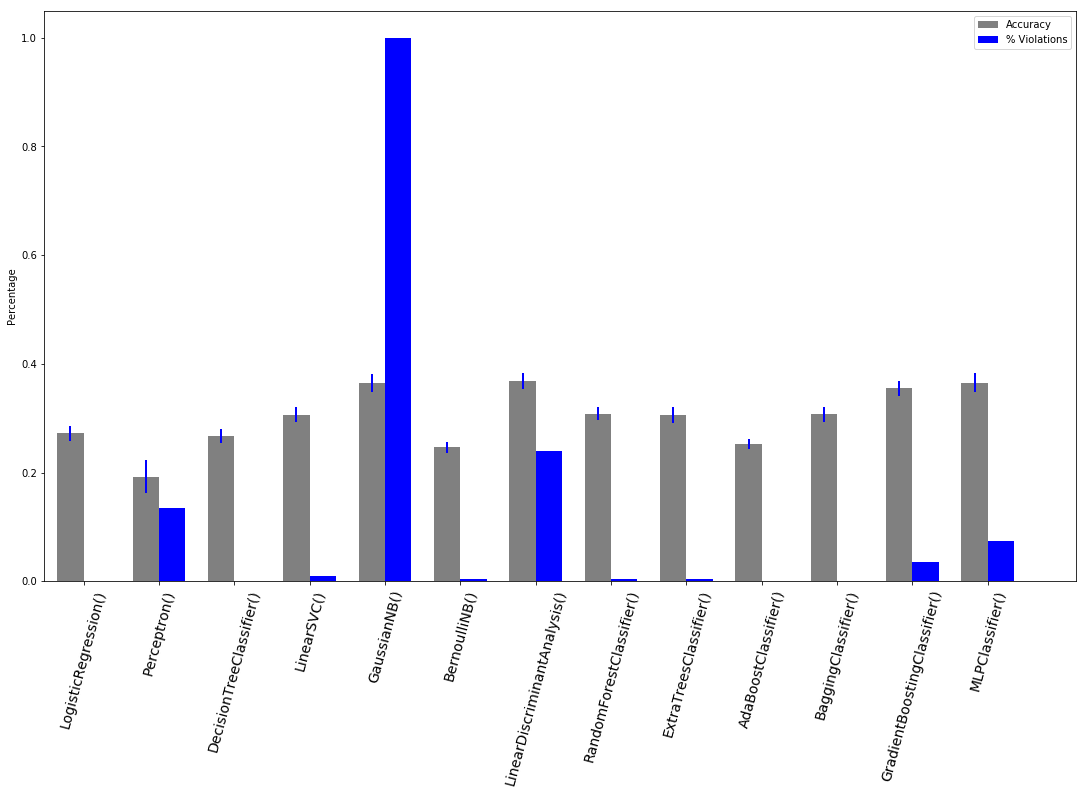

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s

def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()
def run_models(models, model_names, x, y, num_folds=40):
    violations = np.zeros(len(models))
    violation_mean = np.zeros((len(models), num_folds))
    mean = np.zeros((len(models), num_folds))
    mean2 = np.zeros((len(models), num_folds)) # used to store our secondary metric
    
    skf = StratifiedKFold(n_splits=num_folds)
    fold = 0
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for idx, model in enumerate(models):
            model.fit(x_train, y_train)
            original_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])

            original_targets = pd.DataFrame(y_test, columns = ['g'])
            original_df = original_df.join(original_targets)
            test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
            test_df = test_df.join(test_targets)
            #print(get_MB(get_CG(test_df), 'g'))
            print("Error:", model_names[idx], accuracy_score(y_test, model.predict(x_test)))
            
            
            mean[idx][fold] = accuracy_score(y_test, model.predict(x_test))
            mean2[idx][fold] = mean_squared_error(y_test, model.predict(x_test))
            
            setA = get_MB(get_CG(original_df, tetrad), 'g', pc)
            setB = get_MB(get_CG(test_df, tetrad), 'g', pc)
            #assert(setA == {'f'})
            violation_mean[idx][fold] = len(setA.difference(setB)) + len(setB.difference(setA))
            if setA != setB:
                print("Violation:", setA , setB, 'g', pc)
                violations[idx] += 1
            
            #pc.stop_vm()
        fold += 1
    
    print("Violations = ", violations)
    
    metric = []
    metric_err = []
    viol = []
    viol_err = []
    
    #normalize the violations for prettier graphing.
    #also violations are always positive, so just divide by max.
    violation_mean = violation_mean / np.max(violation_mean)
    
    for i in range(len(violations)):
        print("Model_name = ", model_names[i], "Violations = ", violations[i])
        print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
        print("Accuracy = ", np.mean(mean[i]), np.std(mean[i]), "MSE = ", np.mean(mean2[i]), np.std(mean2[i]),)
        metric.append(np.mean(mean[i]))
        metric_err.append(np.std(mean[i]))
        viol.append(np.mean(violation_mean[i]))
        
        viol_err.append(np.std(violation_mean[i]))
    print(np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))    
    
    bar_plot(model_names, 
             np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))
    return 

X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

models = [LogisticRegression(), 
          Perceptron(),  
          DecisionTreeClassifier(),
          LinearSVC(),
          GaussianNB(),
          BernoulliNB(),
          LinearDiscriminantAnalysis(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),
          BaggingClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier()
         ]
model_names = ['LogisticRegression()', 
          'Perceptron()',  
          'DecisionTreeClassifier()',
          'LinearSVC()',
          'GaussianNB()',
          'BernoulliNB()',
          'LinearDiscriminantAnalysis()',
          'RandomForestClassifier()',
          'ExtraTreesClassifier()', 
          'AdaBoostClassifier()',
          'BaggingClassifier()',
          'GradientBoostingClassifier()',
          'MLPClassifier()'
         ]

run_models(models,model_names, X,y)

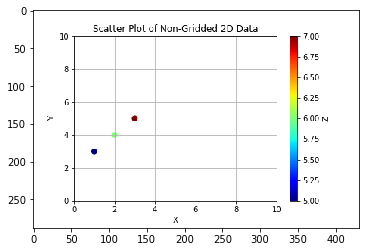

In [25]:
import matplotlib              # plotting library
import matplotlib.mlab as mlab # matlab compatibility functions
from matplotlib.backends import backend_agg as agg # raster backend


#table = pandas.read_table("../example_data/non_gridded_2D.txt", 
#                          sep=' ', header=None, 
#                          names=["x", "y", "z"])
save_file = "save.png"
d = {'x': [1, 2, 3], 'y': [3, 4, 5], 'z':[5,6, 7]}
table = pd.DataFrame(d)
fig = matplotlib.figure.Figure() # create the figure
agg.FigureCanvasAgg(fig)         # attach the rasterizer
ax = fig.add_subplot(1, 1, 1)    # make axes to plot on

cmap = matplotlib.cm.get_cmap("jet")
pts = ax.scatter(table.x, table.y, s=60, c=table.z, cmap=cmap, 
                 linewidth=0)
cbar = fig.colorbar(pts, ax=ax)
fig.axes[-1].set_ylabel("Z")

ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title("Scatter Plot of Non-Gridded 2D Data")
fig.savefig(save_file)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(save_file)
plt.imshow(img)
plt.show()

# Experiment for generalization 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s



def gen_data(mean = 0, var = 1, SIZE = 40000):
    a = np.random.normal(mean, var, SIZE)
    b = np.random.normal(mean, var, SIZE)
    c = np.random.normal(mean, var, SIZE)
    d = np.random.normal(mean, var, SIZE)
    e = np.random.normal(mean, var, SIZE)
    f= a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = f + np.random.normal(mean,var, SIZE)
    g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
from collections import defaultdict
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()

df = gen_data()

means = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
variances = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def run_models(models, model_names, x, y, num_folds=5):
    violations = np.zeros(len(models))
    violation_mean = np.zeros((len(models), num_folds))
    mean = np.zeros((len(models), num_folds))
    mean2 = np.zeros((len(models), num_folds)) # used to store our secondary metric
    
    skf = StratifiedKFold(n_splits=num_folds)
    fold = 0
    
    metrics_dicts = []
    causal_dicts = []
    for m in models:
        metrics_dicts.append(defaultdict(list))
        causal_dicts.append(defaultdict(list))
    
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for idx, model in enumerate(models):
            model.fit(x_train, y_train)
            original_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])

            original_targets = pd.DataFrame(y_test, columns = ['g'])
            original_df = original_df.join(original_targets)
            test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
            test_df = test_df.join(test_targets)
            #print(get_MB(get_CG(test_df), 'g'))
            print("Error:", model_names[idx], accuracy_score(y_test, model.predict(x_test)))
            mean[idx][fold] = accuracy_score(y_test, model.predict(x_test))
            mean2[idx][fold] = mean_squared_error(y_test, model.predict(x_test))
            
        
            setA = get_MB(get_CG(original_df, tetrad), 'g', pc)
            setB = get_MB(get_CG(test_df, tetrad), 'g', pc)
            #assert(setA == {'f'})
            violation_mean[idx][fold] = len(setA.difference(setB)) + len(setB.difference(setA))
            if setA != setB:
                print("Violation:", setA , setB)
                violations[idx] += 1
            
            
            # ok at this point we need to check the model on various variances and means
            for m in means:
                for v in variances:
                    perturbed_df = gen_data(mean =m, var = v, SIZE = 2000)
                    y_test2 = perturbed_df['g']
                    x_test2 = perturbed_df[['a', 'b', 'c', 'd', 'e', 'f']]
                    y_pred2 = model.predict(x_test2)
                    metrics_dicts[idx][str(m) + '_' + str(v)].append(accuracy_score(y_test2, y_pred2))
                    
                    
                    test_df2 = pd.DataFrame(x_test2, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
                    test_targets2 = pd.DataFrame(model.predict(x_test2), columns = ['g'])
                    test_df2 = test_df2.join(test_targets2)
                    setC = get_MB(get_CG(test_df2, tetrad), 'g', pc)
                    if setA != setC:
                        causal_dicts[idx][str(m) + '_' + str(v)].append(1)
                    else:
                        causal_dicts[idx][str(m) + '_' + str(v)].append(0)
                    
        fold += 1
    
    print("Violations = ", violations)
    
    metric = []
    metric_err = []
    viol = []
    viol_err = []
    
    #normalize the violations for prettier graphing.
    #also violations are always positive, so just divide by max.
    violation_mean = violation_mean / np.max(violation_mean)
    
    for i in range(len(violations)):
        print("Model_name = ", model_names[i], "Violations = ", violations[i])
        print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
        print("Accuracy = ", np.mean(mean[i]), np.std(mean[i]), "MSE = ", np.mean(mean2[i]), np.std(mean2[i]),)
        metric.append(np.mean(mean[i]))
        metric_err.append(np.std(mean[i]))
        viol.append(np.mean(violation_mean[i]))
        
        viol_err.append(np.std(violation_mean[i]))
    print(np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))    
    
    bar_plot(model_names, 
             np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))
    return metrics_dicts, causal_dicts

X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

models = [LogisticRegression(), 
          Perceptron(),  
          #DecisionTreeClassifier(),
          #LinearSVC(),
          GaussianNB(),
          #LinearDiscriminantAnalysis(),
          #RandomForestClassifier(),
          #ExtraTreesClassifier(),
          #AdaBoostClassifier(),
          #BaggingClassifier(),
          #GradientBoostingClassifier(),
          #MLPClassifier()
         ]
model_names = ['LogisticRegression()', 
          'Perceptron()',  
          #'DecisionTreeClassifier()',
          #'LinearSVC()',
          'GaussianNB()',
          #'LinearDiscriminantAnalysis()',
          #'RandomForestClassifier()',
          #'ExtraTreesClassifier()', 
          #'AdaBoostClassifier()',
          #'BaggingClassifier()',
          #'GradientBoostingClassifier()',
          #'MLPClassifier()'
         ]

metrics, violations = run_models(models,model_names, X,y)

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Error: LogisticRegression() 0.26607566487701334


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.183418654014234
Error: GaussianNB() 0.360719190910226
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'}
Error: LogisticRegression() 0.26739972510308635
Error: Perceptron() 0.20667249781332
Violation: {'f'} {'b', 'f'}
Error: GaussianNB() 0.3667374734474572
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'}
Error: LogisticRegression() 0.27071616047994
Error: Perceptron() 0.121734783152106
Violation: {'f'} {'e', 'd', 'a'}
Error: GaussianNB() 0.36145481814773156
Violation: {'f'} {'a', 'e', 'f', 'c', 'b', 'd'}
Error: LogisticRegression() 0.2674171357098186


In [ ]:
def heat_plot(x,y,z):
    fig, ax = plt.subplots()
    cax = ax.scatter(x, y, c=z, s=100, edgecolor='')
    plt.colorbar(cax)
    plt.show()

for idx, m in enumerate(models):
    print(model_names[idx])
    x = []
    y = []
    z = []
    for k, v in metrics[idx].items():
        x.append(int(k.split('_')[0]))
        y.append(int(k.split('_')[-1]))
        z.append(np.mean(v))
    heat_plot(x,y,z)
        
    x = []
    y = []
    z = []
    for k, v in violations[idx].items():
        x.append(int(k.split('_')[0]))
        y.append(int(k.split('_')[-1]))
        z.append(np.sum(v) / len(v))
    heat_plot(x,y,z) 